In [2]:
#import tweepy

In [5]:
# consumer_key='Your Consumer Key'
# consumer_secret='Your Secret Key'
# access_token='Your access token'
# access_token_secret='Your access token secret'

# auth=tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
# api=tweepy.API(auth)

In [15]:
#tweets=api.search_tweets(q="Google Pixel", count=25, lang="en", tweet_mode="extended")

In [19]:
#import snscrape.modules.twitter as sntwitter

In [1]:
# query="Google Pixel"
# tweets=[]
# for tweet in sntwitter.TwitterSearchScraper(query+' since:2024-01-01 until:2024-5-31').get_items():
#     if len(tweets)==100:
#         break
#     tweets.append([tweet.date, tweet.content])
# tweets_df=pd.DataFrame(tweets, columns=['Data', 'Tweet'])
# tweets_df.head()

In [1]:
#Importing Libraries
import praw
from textblob import TextBlob
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora, models
from gensim.models import LdaModel
from nltk.corpus import stopwords
import networkx as nx
import community.community_louvain as community_louvain
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARTIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import praw
from textblob import TextBlob
from datetime import datetime
# Set up Reddit API client
reddit = praw.Reddit(client_id='Your client ID', 
                     client_secret='Your secret ID', 
                     user_agent='Analysis u/Kaishi_Light')
data=[]
#creating data and performing sentimental analysis
for post in reddit.subreddit('GooglePixel').hot(limit=2000):
    data.append({
            'Post': post.title,
            'Sentiment': TextBlob(post.title).sentiment.polarity,
            'Upvotes': post.score,
            'Timestamp':datetime.utcfromtimestamp(post.created_utc)
        })

C:\Users\KARTIK\AppData\Local\Temp\ipykernel_13916\4214805155.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  'Timestamp':datetime.utcfromtimestamp(post.created_utc)


In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Post,Sentiment,Upvotes,Timestamp
0,Weekly #TeamPixel Photos Megathread July 25 2024,0.0,0,2024-07-25 10:00:22
1,The July 2024 Superthread: Battery; Orders; Wh...,0.5,22,2024-07-01 10:00:36
2,Exclusive: Google Pixel 9 & Pro will start wit...,0.0,233,2024-07-31 12:41:12
3,Google Pixel 9’s Tensor G4 is almost identical...,0.0,112,2024-07-31 15:44:23
4,Exclusive: Google Pixel 9 series will surprisi...,0.7,85,2024-07-31 14:35:42


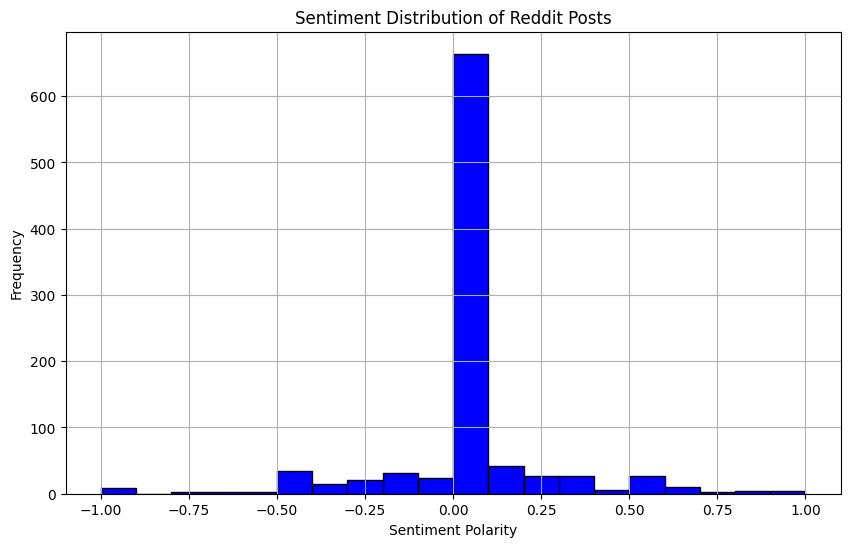

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Sentiment'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Reddit Posts')
plt.grid(True)
plt.show()


In [7]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# # Vectorize the text data
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
# dtm = vectorizer.fit_transform(df['Post'])

# # Fit the LDA model
# LDA = LatentDirichletAllocation(n_components=5, random_state=42)
# LDA.fit(dtm)

# # Display the top words in each topic
# for i, topic in enumerate(LDA.components_):
#     print(f"Top words for topic #{i}:")
#     # print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Top words for topic #0:
['bluetooth', 'does', 'features', 'update', 'google', 'watch', 'messages', 'phone', 'new', 'pixel']
Top words for topic #1:
['lock', 'issue', 'does', 'phone', 'google', 'issues', 'help', '8a', 'screen', 'pixel']
Top words for topic #2:
['fold', 'problem', '6a', 'video', 'xl', 'camera', 'buds', 'google', 'pro', 'pixel']
Top words for topic #3:
['android', 'camera', 'working', 'series', 'wifi', 'charging', 'apps', 'app', 'google', 'pixel']
Top words for topic #4:
['mode', 'case', 'notifications', 'good', 'phone', 'issue', 'turn', 'use', '7a', 'pixel']


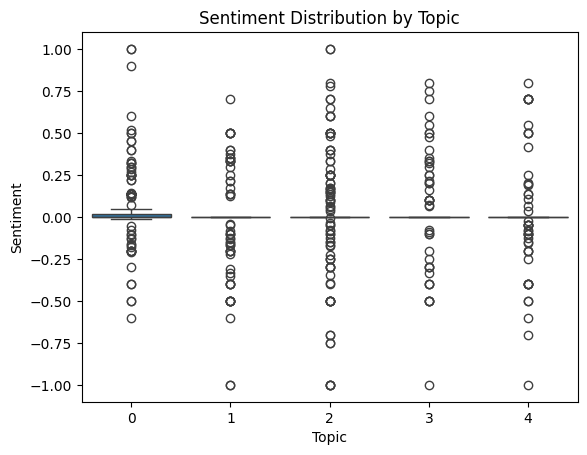

In [8]:
# import numpy as np
# import seaborn as sns
# # Assign the most likely topic to each post
# topic_values = LDA.transform(dtm)
# df['Topic'] = topic_values.argmax(axis=1)

# # Analyze sentiment distribution by topic
# sns.boxplot(x='Topic', y='Sentiment', data=df)
# plt.title('Sentiment Distribution by Topic')
# plt.show()


In [9]:
df['Post'] = df['Post'].str.lower().str.replace(r'[^\w\s]', '', regex=True)


# Convert text to numerical representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Post'])

In [10]:
from gensim import corpora, models
from gensim.models import LdaModel
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens
df['Tokens'] = df['Post'].apply(preprocess)
dictionary = corpora.Dictionary(df['Tokens'])
corpus = [dictionary.doc2bow(text) for text in df['Tokens']]

# Apply LDA
lda_model = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=15)

# Print topics
for topic in lda_model.print_topics():
    print(topic)
topic_distributions = [lda_model.get_document_topics(doc) for doc in corpus]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KARTIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(0, '0.069*"pixel" + 0.015*"screen" + 0.012*"update" + 0.011*"notifications" + 0.008*"working" + 0.008*"camera" + 0.007*"new" + 0.007*"google" + 0.007*"get" + 0.006*"phone"')
(1, '0.109*"pixel" + 0.043*"google" + 0.038*"pro" + 0.017*"phone" + 0.010*"issues" + 0.010*"charging" + 0.008*"video" + 0.007*"anyone" + 0.007*"android" + 0.006*"photos"')
(2, '0.050*"pixel" + 0.028*"screen" + 0.014*"google" + 0.010*"new" + 0.008*"features" + 0.008*"doesnt" + 0.008*"pro" + 0.007*"work" + 0.007*"apps" + 0.007*"camera"')
(3, '0.045*"pixel" + 0.024*"pro" + 0.023*"issue" + 0.018*"google" + 0.010*"buds" + 0.007*"im" + 0.006*"screen" + 0.006*"trade" + 0.006*"go" + 0.006*"share"')


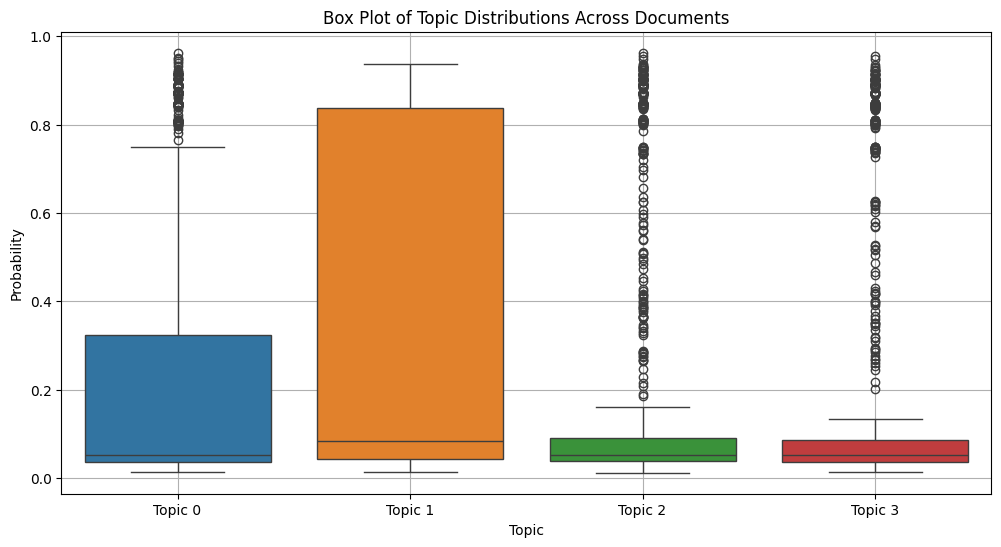

In [11]:

topic_distribution_matrix = [[dict(doc_topics).get(t, 0) for t in range(lda_model.num_topics)] for doc_topics in topic_distributions]

# Create DataFrame for visualization
df_topic_dist = pd.DataFrame(topic_distribution_matrix, columns=[f'Topic {i}' for i in range(lda_model.num_topics)])

# Box Plot of Topic Distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_topic_dist)
plt.title('Box Plot of Topic Distributions Across Documents')
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

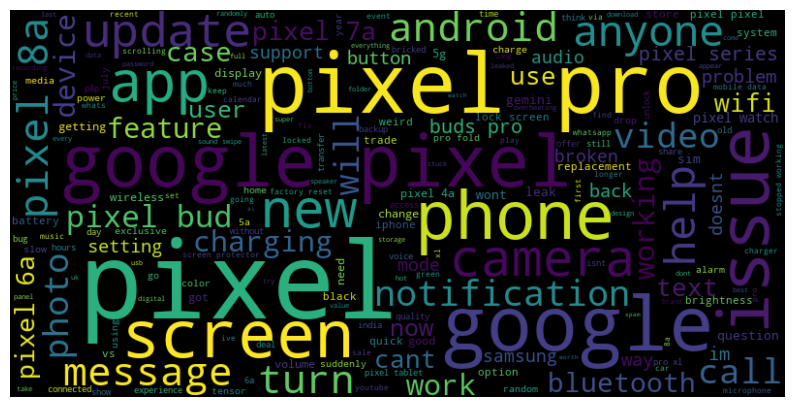

In [12]:
from wordcloud import WordCloud

# Combine all posts into a single string
all_words = ' '.join([text for text in df['Post']])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


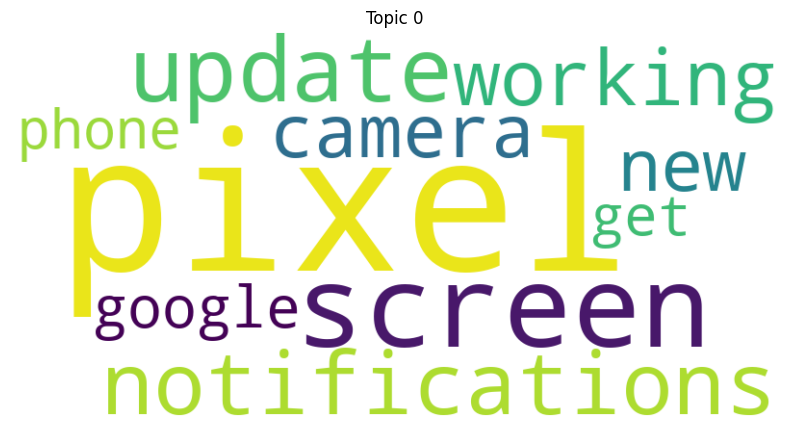

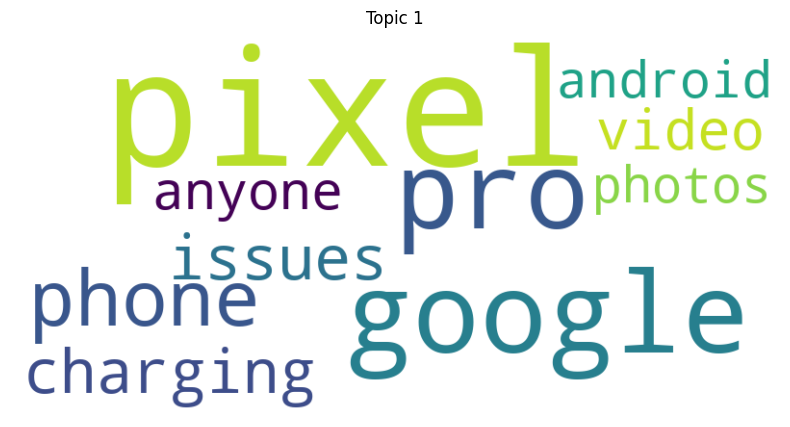

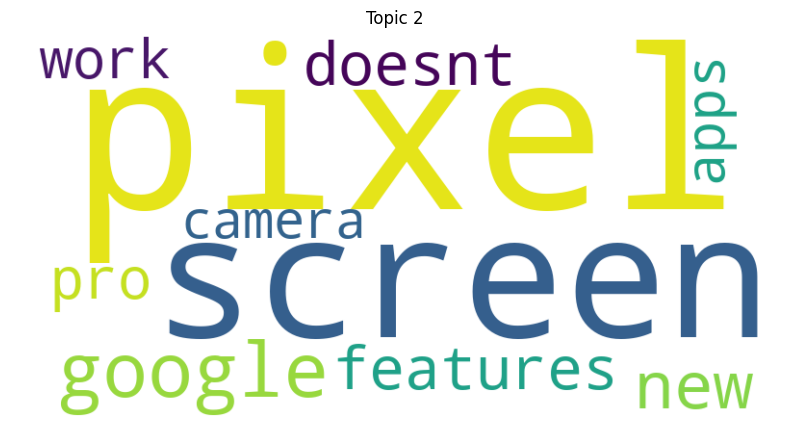

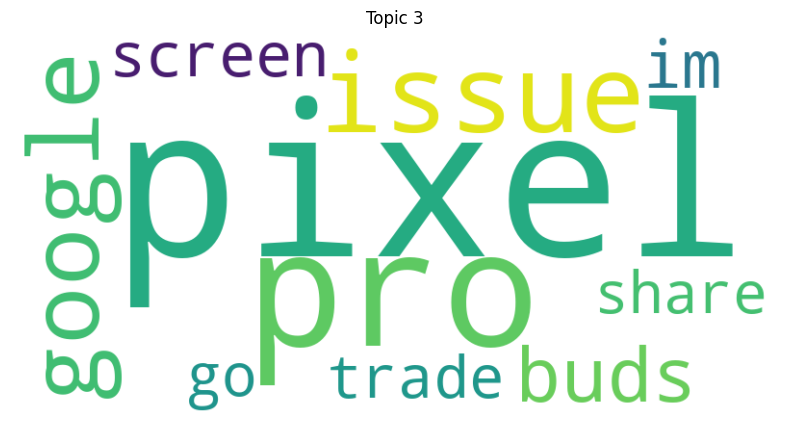

In [13]:
def plot_wordcloud_for_topic(lda_model, topic_id, num_words=50):
    topic_words = lda_model.show_topic(topic_id)
    # Only take the top num_words words
    topic_words = topic_words[:num_words]
    word_freq = dict(topic_words)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id}')
    plt.show()

# Plot word clouds for each topic
for topic_id in range(lda_model.num_topics):
    plot_wordcloud_for_topic(lda_model, topic_id)

<Figure size 1500x800 with 0 Axes>

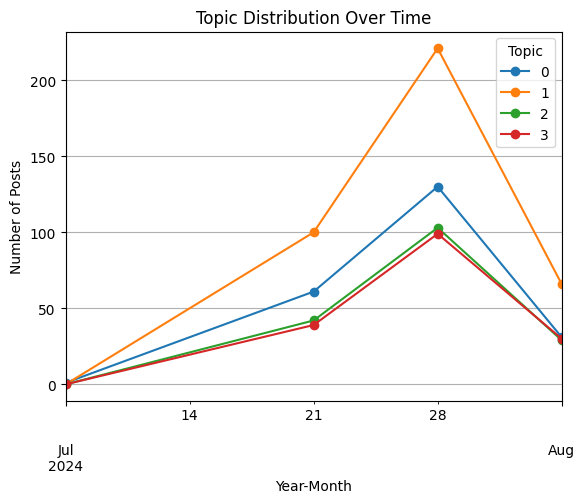

In [14]:

import datetime

# Example: adding dummy timestamps for demonstration


# Group by date to analyze sentiment over time
df['Year'] = df['Timestamp'].dt.to_period('W')

df['Topic'] = [max(doc_topics, key=lambda x: x[1])[0] for doc_topics in topic_distributions]

topic_trends = df.groupby(['Year', 'Topic']).size().unstack().fillna(0)

# Plot topic distribution over time
plt.figure(figsize=(15, 8))
topic_trends.plot(kind='line', marker='o')
plt.title('Topic Distribution Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Posts')
plt.legend(title='Topic')
plt.grid(True)
plt.show()

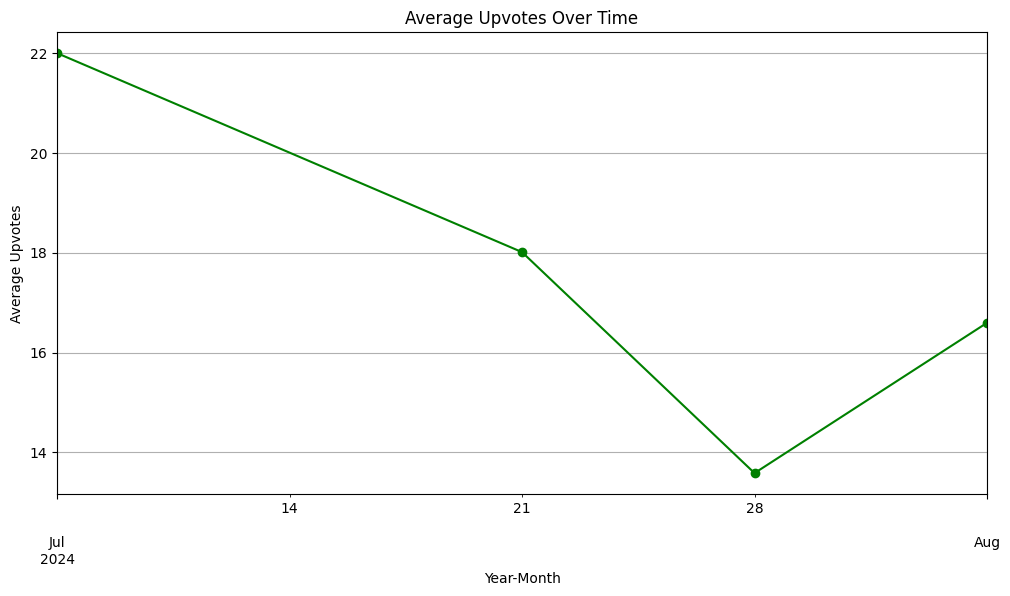

In [35]:
import matplotlib.pyplot as plt

# Group by year and month and calculate average upvotes
upvote_trends = df.groupby('Year')['Upvotes'].mean()

# Plot upvote trends
plt.figure(figsize=(12, 6))
upvote_trends.plot(kind='line', marker='o', color='green')
plt.title('Average Upvotes Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Upvotes')
plt.grid(True)
plt.show()


In [ ]:
# Example: assuming each post has an 'Upvotes' column (this is hypothetical)


# Analyze the relationship between sentiment and upvotes
plt.figure(figsize=(10, 6))
plt.scatter(df['Sentiment'], df['Upvotes'], alpha=0.5)
plt.title('Sentiment vs. Upvotes')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Upvotes')
plt.grid(True)
plt.show()


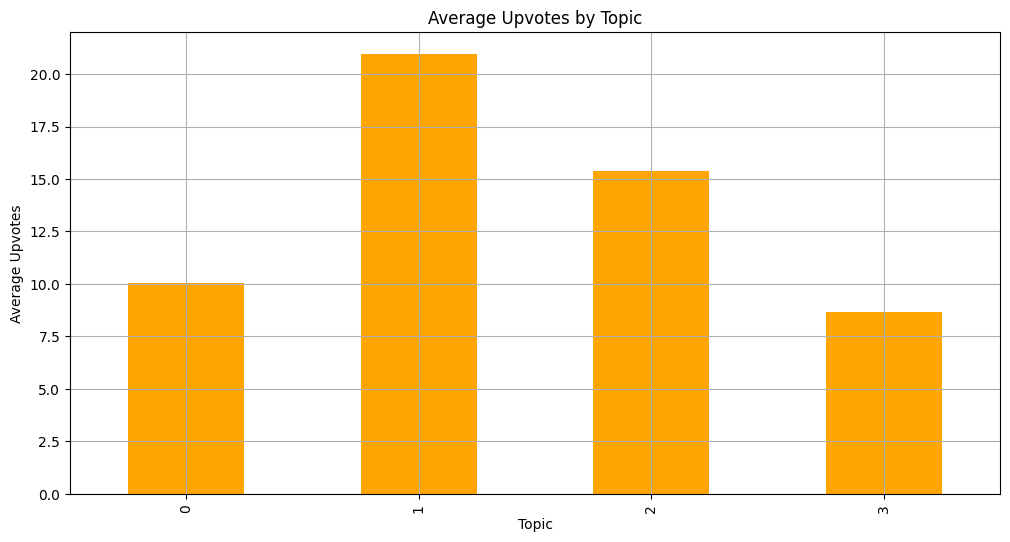

In [16]:
# Assuming you have a 'Topic' column in your DataFrame
# Group by topic and calculate average upvotes
topic_upvotes = df.groupby('Topic')['Upvotes'].mean()

# Plot average upvotes by topic
plt.figure(figsize=(12, 6))
topic_upvotes.plot(kind='bar', color='orange')
plt.title('Average Upvotes by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Upvotes')
plt.grid(True)
plt.show()


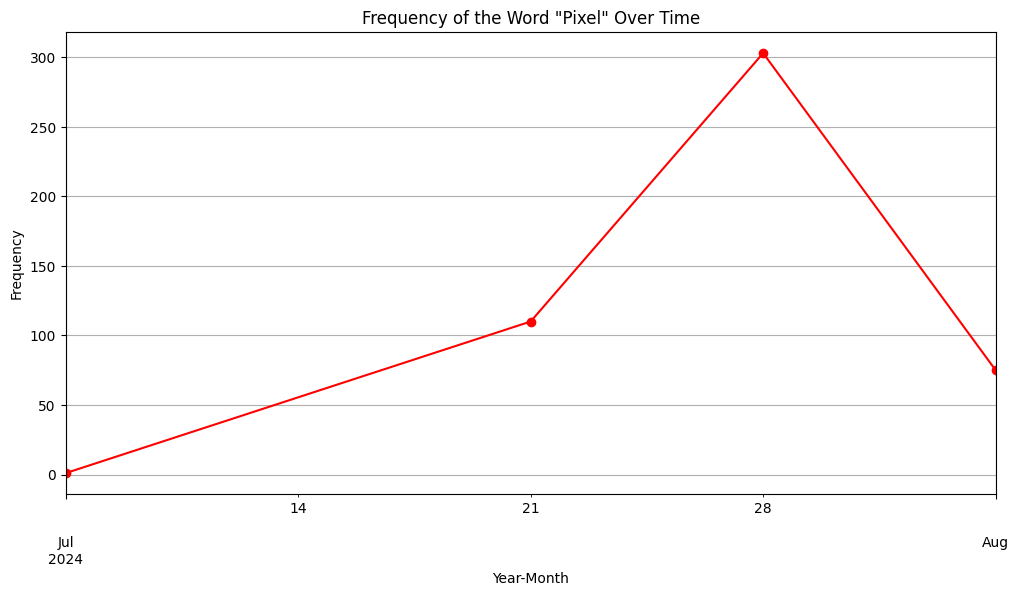

In [18]:
from collections import Counter

# Example function to extract and count words
def extract_words(text):
    return text.lower().split()

# Apply function to extract words
df['Words'] = df['Post'].apply(extract_words)

# Aggregate word counts by time period
word_counts = df.explode('Words').groupby(['Year', 'Words']).size().unstack(fill_value=0)

# Plot the trend for a specific word (e.g., 'pixel')
plt.figure(figsize=(12, 6))
word_counts['pixel'].plot(kind='line', marker='o', color='red')
plt.title('Frequency of the Word "Pixel" Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize the posts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Post'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(X, X)

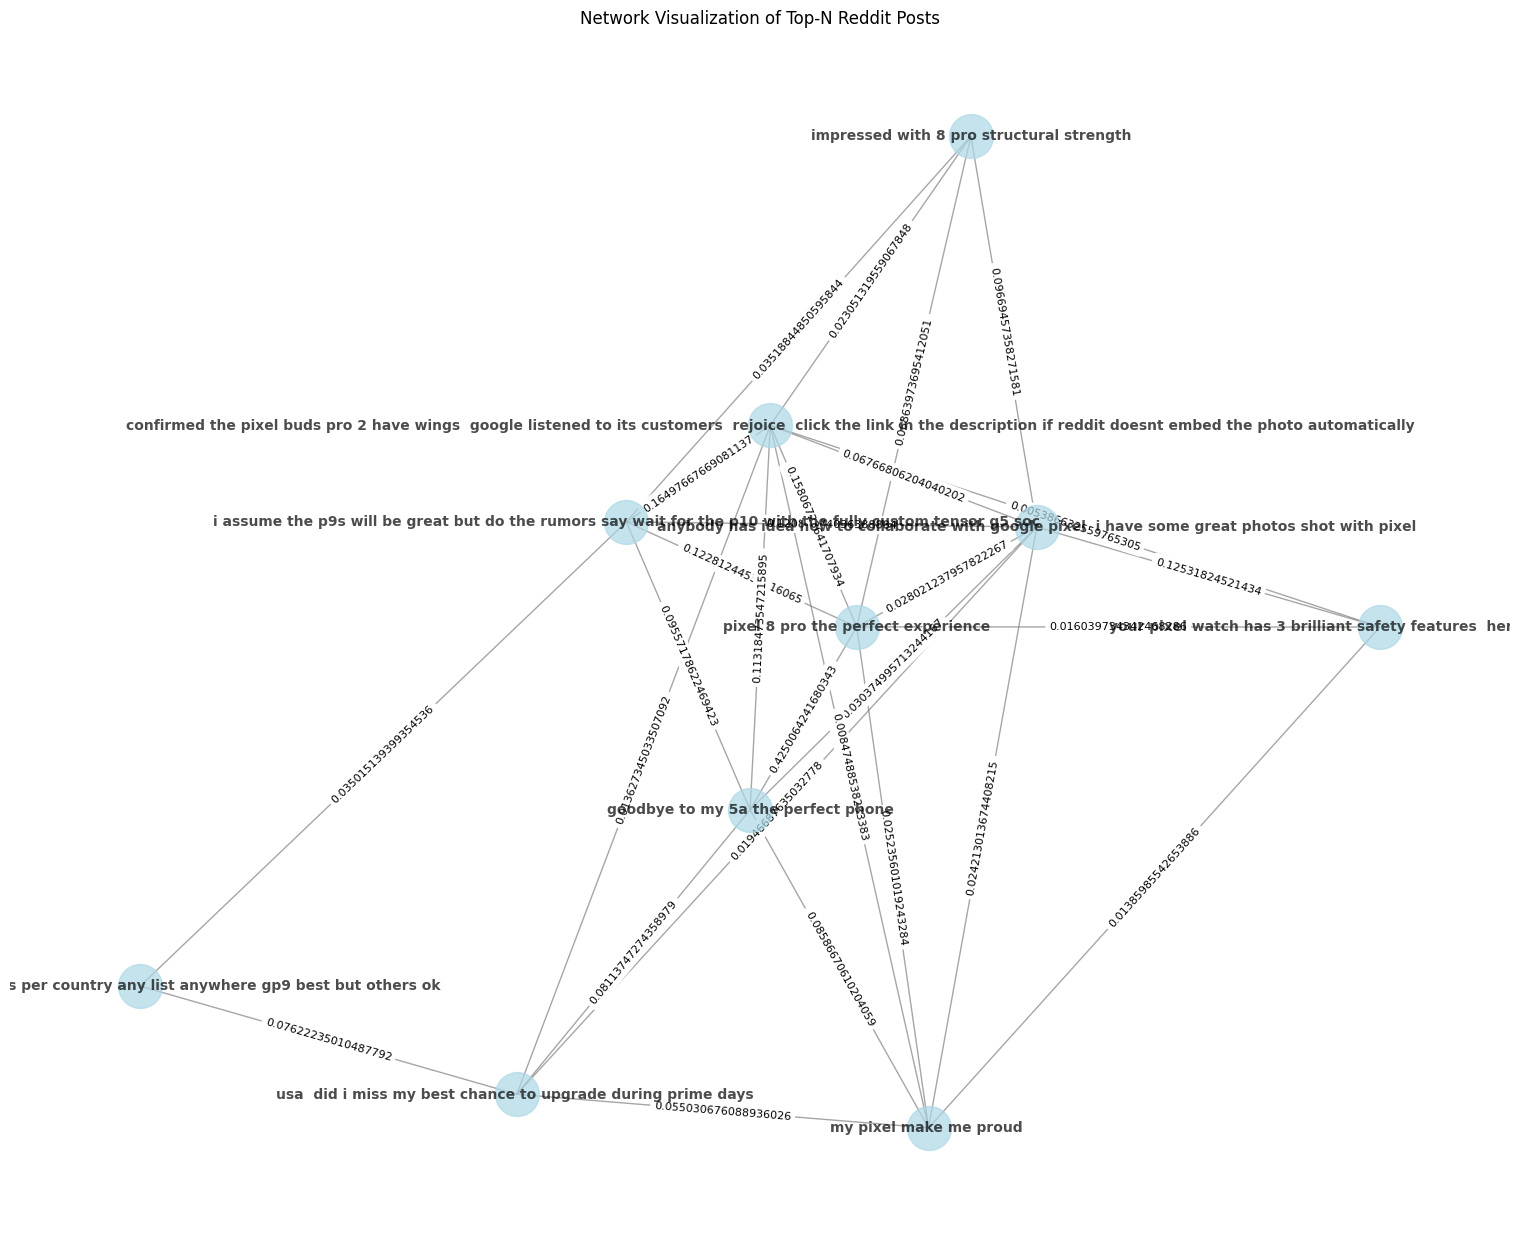

In [29]:
G = nx.Graph()

# Add nodes with sentiment as an attribute
for index, row in df.iterrows():
    G.add_node(row['Post'], sentiment=row['Sentiment'])

# Add edges based on similarity
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if cosine_sim[i, j] > 0:
            G.add_edge(df['Post'][i], df['Post'][j], weight=cosine_sim[i, j])

# Determine top N nodes based on sentiment score (or other criteria)
top_n = 10
top_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['sentiment'], reverse=True)[:top_n]
top_nodes = [node[0] for node in top_nodes]

# Filter the graph to include only top N nodes and corresponding edges
H = G.subgraph(top_nodes).copy()

# Visualization
plt.figure(figsize=(15, 12))  # Adjust figure size for better clarity

# Choose layout
pos = nx.spring_layout(H, seed=42, k=0.3)  # Adjust `k` for better spacing

# Draw nodes, edges, and labels
nx.draw(H, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', alpha=0.7)

# Draw edge labels (if needed)
edge_labels = nx.get_edge_attributes(H, 'weight')
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=8)

plt.title('Network Visualization of Top-N Reddit Posts')
plt.show()

In [30]:
centrality = nx.degree_centrality(G)


In [31]:
import community.community_louvain as community_louvain

partition = community_louvain.best_partition(G.to_undirected())



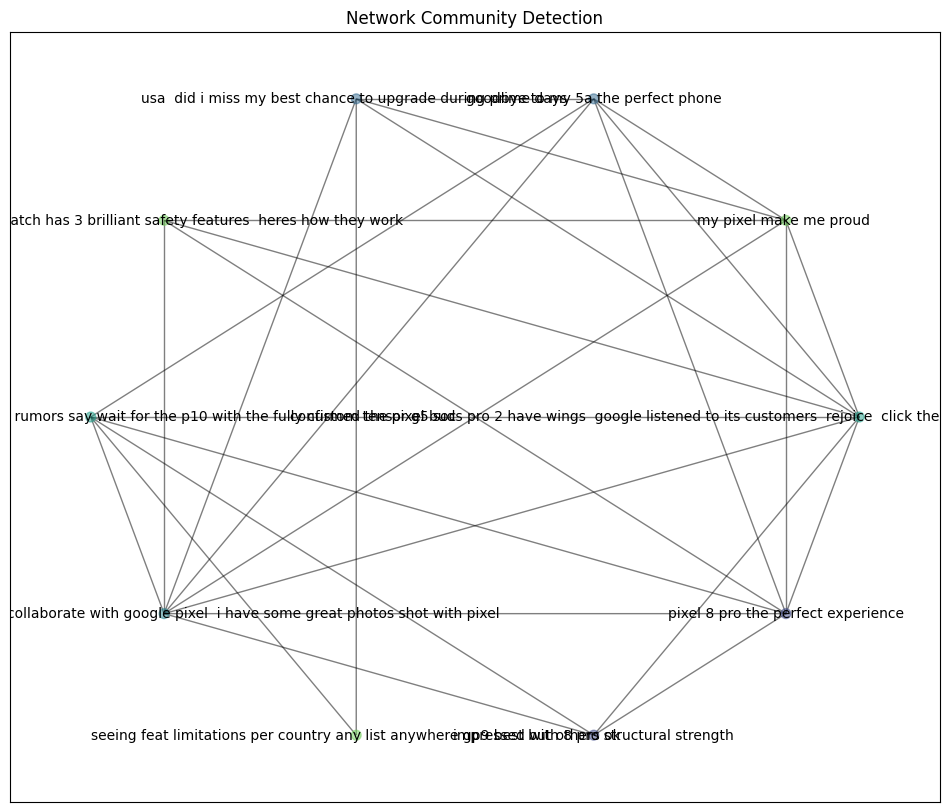

In [32]:
plt.figure(figsize=(12, 10))
pos = nx.shell_layout(H)
cmap = plt.get_cmap('viridis')
colors = [cmap(partition[node] / max(partition.values())) for node in H.nodes()]

nx.draw_networkx_nodes(H, pos, node_size=50, node_color=colors, alpha=0.5)
nx.draw_networkx_edges(H, pos, alpha=0.5)
nx.draw_networkx_labels(H, pos, font_size=10, font_color='black')

plt.title('Network Community Detection')
plt.show()

In [33]:


# Compute degrees of all nodes
degrees = dict(G.degree())

# Find the node with the highest degree
max_node = max(degrees, key=degrees.get)
max_degree = degrees[max_node]

print(f'Node with the highest number of connections: {max_node}')
print(f'Number of connections (degree): {max_degree}')


Node with the highest number of connections: i have a pixel 7 pro im trying to listen to audio in a museum on headphones and google assistant keeps interrupting even when i turn off the assistant i get a prompt to turn it back on this is so annoying how do i fix this
Number of connections (degree): 752
